#***Sentimental Analysis On IMDB Dataset***

#**Mounting Google Drive**


In [55]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


#**Importing Python Packages**

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics
from sklearn.metrics import accuracy_score, plot_confusion_matrix

#**Importing IMDB Dataset from Google Drive**

In [57]:
filename = '/gdrive/My Drive/IMDB Dataset.csv'

In [58]:
data_frame = pd.read_csv(filename)
data_frame.head(n = 15)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [59]:
review = data_frame.iloc[:,0]
sentiment = data_frame.iloc[:,1]
print(review)
print(sentiment)

0        One of the other reviewers has mentioned that ...
1        A wonderful little production. <br /><br />The...
2        I thought this was a wonderful way to spend ti...
3        Basically there's a family where a little boy ...
4        Petter Mattei's "Love in the Time of Money" is...
                               ...                        
49995    I thought this movie did a down right good job...
49996    Bad plot, bad dialogue, bad acting, idiotic di...
49997    I am a Catholic taught in parochial elementary...
49998    I'm going to have to disagree with the previou...
49999    No one expects the Star Trek movies to be high...
Name: review, Length: 50000, dtype: object
0        positive
1        positive
2        positive
3        negative
4        positive
           ...   
49995    positive
49996    negative
49997    negative
49998    negative
49999    negative
Name: sentiment, Length: 50000, dtype: object


#**Reviewing Input**
Input is divided equally, no biasing is there.

In [60]:
class_name = ["negative", "positive"]

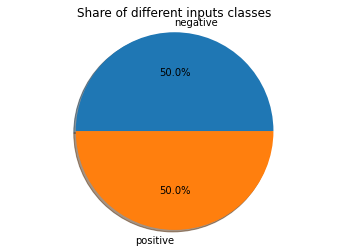

In [61]:
total_positive = np.sum(sentiment == 'positive')
total_negative = np.sum(sentiment == "negative")
input_list = [total_positive, total_negative]
plt.pie(input_list, labels = class_name, autopct= '%0.1f%%', shadow = True)
plt.title("Share of different inputs classes")
plt.axis('equal')
plt.show()

#**Tf - Idf**
Term frequency Inverse Document Frequency

In [62]:
vectorizer = TfidfVectorizer()
freq = vectorizer.fit_transform(review)

#**Splitting into training and testing**

In [63]:
X_train, X_test, y_train, y_test = train_test_split(freq, sentiment, test_size = 0.10, random_state = 0)

#**Classification Using Bernoulli Naive Bayes**

In [64]:
BNB = BernoulliNB()
classifier = BNB.fit(X_train, y_train)

#**Prediction On Testing Data**

In [65]:
y_pred = classifier.predict(X_test)

#**Accuracy**

In [66]:
score = np.mean(y_pred == y_test)
score = score*100
score = round(score, 1)
print(score)

84.9


#**Confusion Metrix**

In [67]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.84      0.87      0.85      2553
    positive       0.86      0.83      0.84      2447

    accuracy                           0.85      5000
   macro avg       0.85      0.85      0.85      5000
weighted avg       0.85      0.85      0.85      5000



[[2212  341]
 [ 414 2033]]


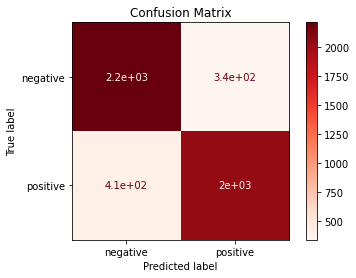

In [68]:
disp = plot_confusion_matrix(classifier, X_test, y_test, display_labels=class_name, cmap=plt.cm.Reds)
disp.ax_.set_title("Confusion Matrix")
# print("Confusion Matrix")
print(disp.confusion_matrix)
